In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split

In [83]:
# Download the dataset, source: https://www.openml.org/d/31
!wget https://www.openml.org/data/get_csv/1586225/php0iVrYT.csv

--2020-02-27 21:34:53--  https://www.openml.org/data/get_csv/1586225/php0iVrYT.csv
Resolving www.openml.org (www.openml.org)... 131.155.11.11
Connecting to www.openml.org (www.openml.org)|131.155.11.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘php0iVrYT.csv.1’

php0iVrYT.csv.1         [ <=>                ]  10.27K  --.-KB/s    in 0s      

2020-02-27 21:34:54 (98.6 MB/s) - ‘php0iVrYT.csv.1’ saved [10512]



In [0]:
# Import the data
dataset = pd.read_csv("php0iVrYT.csv")

In [0]:
"""
* V1: Recency - months since last donation
* V2: Frequency - total number of donation
* V3: Monetary - total blood donated in c.c.
* V4: Time - months since first donation), and a binary variable representing whether he/she donated blood in March 2007 
      (1 stand for donating blood; 0 stands for not donating blood).

The target attribute is a binary variable representing whether he/she donated blood in March 2007 (2 stands for donating blood; 1 stands for not donating blood).
"""
cols = ['Recency', 'Frequency', 'Monetary', 'Time','Class']
dataset.columns = cols

In [0]:
# Substract 1 from Class column to convert the classification to binary classification
dataset.Class = dataset.Class - 1

In [154]:
dataset.describe()

,Recency,Frequency,Monetary,Time,Class
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [0]:
X = dataset.iloc[:, :-1].values # features
Y = dataset.iloc[:, -1].values # target variable

In [0]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .25)

In [0]:
# Scale features
scaler = MinMaxScaler(feature_range = (0, 10))
X_train, X_test = scaler.fit_transform(X_train), scaler.fit_transform(X_test)

In [160]:
X_train

array([[3.10810811, 1.42857143, 1.42857143, 6.45833333],
       [0.27027027, 1.02040816, 1.02040816, 4.0625    ],
       [1.89189189, 0.81632653, 0.81632653, 2.5       ],
       ...,
       [0.27027027, 0.6122449 , 0.6122449 , 1.25      ],
       [0.27027027, 0.6122449 , 0.6122449 , 7.08333333],
       [0.27027027, 0.20408163, 0.20408163, 2.08333333]])

Train on 561 samples, validate on 187 samples
Epoch 1/250
561/561 - 0s - loss: 0.5884 - accuracy: 0.7291 - val_loss: 0.4005 - val_accuracy: 0.8342
Epoch 2/250
561/561 - 0s - loss: 0.5389 - accuracy: 0.7576 - val_loss: 0.3762 - val_accuracy: 0.8342
Epoch 3/250
561/561 - 0s - loss: 0.5134 - accuracy: 0.7754 - val_loss: 0.3761 - val_accuracy: 0.8289
Epoch 4/250
561/561 - 0s - loss: 0.5062 - accuracy: 0.7701 - val_loss: 0.3758 - val_accuracy: 0.8128
Epoch 5/250
561/561 - 0s - loss: 0.5207 - accuracy: 0.7469 - val_loss: 0.3759 - val_accuracy: 0.8342
Epoch 6/250
561/561 - 0s - loss: 0.4950 - accuracy: 0.7807 - val_loss: 0.3764 - val_accuracy: 0.8182
Epoch 7/250
561/561 - 0s - loss: 0.4908 - accuracy: 0.7594 - val_loss: 0.3771 - val_accuracy: 0.8342
Epoch 8/250
561/561 - 0s - loss: 0.5013 - accuracy: 0.7772 - val_loss: 0.3761 - val_accuracy: 0.8289
Epoch 9/250
561/561 - 0s - loss: 0.4950 - accuracy: 0.7665 - val_loss: 0.3758 - val_accuracy: 0.8342
Epoch 10/250
561/561 - 0s - loss: 0.4982 - ac

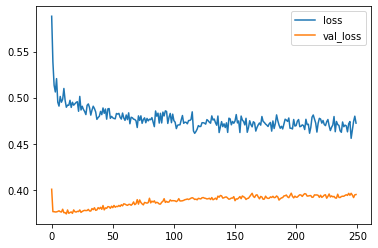

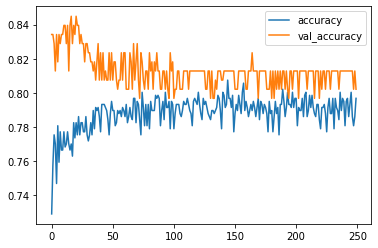

In [183]:
# Train the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape = (X_train.shape[1],)),
  tf.keras.layers.Dense(256, activation = 'relu'),
  tf.keras.layers.Dropout(.4),
  tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# compile
opt = tf.keras.optimizers.Adamax(learning_rate = 0.01)
model.compile(optimizer = opt,
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])


# fit the model
r = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 250, verbose = 2)

# plot the loss
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()